# CZ3005 Assignment 1: Balancing a Pole on a Cart


## Installing Dependencies

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Dependencies

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

## Defining Parameters

In [ ]:
# Learning Rate
ALPHA = 0.05

# Discount Factor
GAMMA = 0.99

# Epsilon Decay
EPSILON_DECAY = 0.9997

# Number of Episodes
NUM_EPISODES = 30000

# Q-table size
CART_POS_N = 30
CART_VEL_N = 30
POLE_ANGLE_N = 30
POLE_OMEGA_N = 30

# Define Lower & Upper Bound
STATE_UPPER_BOUND = np.array([4.8, 4.0, 0.418, 4.0])
STATE_LOWER_BOUND = np.array([-4.8, -4.0, -0.418, -4.0])

## Environment Setup

In [ ]:
# Initialize OpenAI CartPole
env = gym.make('CartPole-v1')

# Initialize Q-table
q_table = np.random.uniform(low=-1, high=1, size=(CART_POS_N, CART_VEL_N, POLE_ANGLE_N, POLE_OMEGA_N, env.action_space.n))

## Defining Helper Functions

In [ ]:
def discretize(state):
    normalized = (state - STATE_LOWER_BOUND) / (STATE_UPPER_BOUND - STATE_LOWER_BOUND)
    discrete_state = np.clip(normalized, 0, 0.999) * np.array([CART_POS_N, CART_VEL_N, POLE_ANGLE_N, POLE_OMEGA_N])
    return tuple(discrete_state.astype(int))

def rl_agent(state):
    return np.argmax(q_table[state])

def get_video():
    # get video list
    mp4list = glob.glob('video/*.mp4')

    if len(mp4list) > 0:
        # get video data
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        data = '''{0}'''.format(encoded.decode('ascii'))

        # format html
        return HTML('''
        <video alt="CartPole RL Agent" controls>
          <source type="video/mp4" src="data:video/mp4;base64,{0}">
        </video>
        '''.format(data))

    else:
      print("Could not find video")

## Task 1: Development of an RL agent

Run Q-learning Algorithm to populate Q-table

Episode: 1000
Reward: 24.0
Epsilon: 0.7407848779433163

Episode: 2000
Reward: 36.0
Epsilon: 0.5487622353894926

Episode: 3000
Reward: 51.0
Epsilon: 0.40651476556290533

Episode: 4000
Reward: 141.0
Epsilon: 0.3011399909896719

Episode: 5000
Reward: 323.0
Epsilon: 0.22307995146913462

Episode: 6000
Reward: 134.0
Epsilon: 0.1652542546206636

Episode: 7000
Reward: 259.0
Epsilon: 0.12241785283878157

Episode: 8000
Reward: 237.0
Epsilon: 0.09068529417325935

Episode: 9000
Reward: 500.0
Epsilon: 0.06717829457539158

Episode: 10000
Reward: 277.0
Epsilon: 0.04976466474747149

Episode: 11000
Reward: 141.0
Epsilon: 0.03686491110084566

Episode: 12000
Reward: 500.0
Epsilon: 0.027308968670231117

Episode: 13000
Reward: 500.0
Epsilon: 0.02023007102313499

Episode: 14000
Reward: 500.0
Epsilon: 0.014986130693657639

Episode: 15000
Reward: 500.0
Epsilon: 0.011101498996743729

Episode: 16000
Reward: 500.0
Epsilon: 0.008223822579290642

Episode: 17000
Reward: 500.0
Epsilon: 0.006092083405627285

Episode:

Text(0.5, 0, 'Episode')

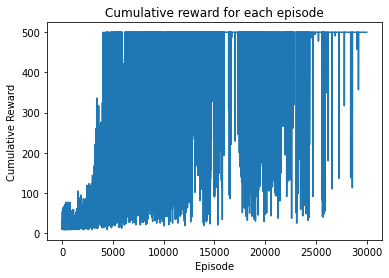

In [ ]:
epsilon = 1.0
episode_rewards = []

for episode in range(NUM_EPISODES):
    # Reset environment for new episode
    observation = env.reset()
    state = discretize(observation)
    # Reset variables
    cumulative_reward = 0
    steps_count = 0
    done = False

    # Stop when reaching end state or an episode length of 500
    while not done and steps_count < 500:
        # Use Epsilon-Greedy Action Selection to balance exploration and exploitation
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = rl_agent(state)

        # Perform action
        observation, reward, done, info = env.step(action)
        state_next = discretize(observation)
        cumulative_reward += reward
        steps_count += 1

        # Update Q-table
        q_table[state][action] = (1 - ALPHA) * q_table[state][action] + ALPHA * (reward + GAMMA * np.max(q_table[state_next]))
        state = state_next

    # Update Epsilon
    epsilon *= EPSILON_DECAY

    if (episode + 1) % 1000 == 0:
        print(f"Episode: {episode + 1}")
        print(f"Reward: {cumulative_reward}")
        print(f"Epsilon: {epsilon}")
        print()

    # Save cumulative reward
    episode_rewards.append(cumulative_reward)
  
plt.plot(episode_rewards)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')

## Task 2: Demonstrate the effectiveness of the RL agent

Average Reward: 500.0


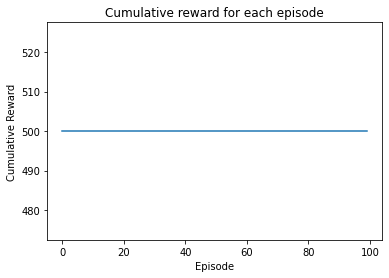

In [ ]:
episode_rewards = []

for episode in range(100):
    # Reset environment for new episode
    observation = env.reset()
    state = discretize(observation)
    # Reset variables
    cumulative_reward = 0
    steps_count = 0
    done = False

    # Stop when reaching end state or an episode length of 500
    while not done and steps_count < 500:
        # Perform action
        action = rl_agent(state)
        observation, reward, done, info = env.step(action)
        state = discretize(observation)
        cumulative_reward += reward
        steps_count += 1

    # Save cumulative reward
    episode_rewards.append(cumulative_reward)

plt.plot(episode_rewards)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
print(f"Average Reward: {np.average(episode_rewards)}")

## Task 3: Render one episode played by the developed RL agent

Record one episode played by the developed RL agent and save it to `./video` directory

In [ ]:
# Initialize Environment
env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()
state = discretize(observation)

# Play one episode
cumulative_reward = 0
while True:
    env.render()
    action = rl_agent(state)
    observation, reward, done, info = env.step(action)
    state = discretize(observation)
    cumulative_reward += reward
    if done:
        break
print(f"Reward: {cumulative_reward}")
env.close()

Reward: 500.0


Display the recorded video as HTML

In [ ]:
# get video html
video = get_video()
from IPython import display
display.display(video)